In [1]:
import numpy as np
from sklearn.decomposition import PCA

In [2]:
import pandas as pd

In [3]:
def generate_data(input_name: str):
    file = input_name
    return np.genfromtxt(file)

X = generate_data('0.txt')
Y = generate_data('1.txt')
Z = generate_data('2.txt')

def array_to_dataframe(data, column_names):
    return pd.DataFrame(data, columns=column_names)

column_names = ['Frames', 'E2E', 'Phi1', 'Psi1', 'Phi2', 'Psi2', 'Phi3', 'Psi3']
df1 = array_to_dataframe(X, column_names)
df2 = array_to_dataframe(Y, column_names)
df3 = array_to_dataframe(Z, column_names)

In [4]:
df1 = df1.drop(columns=['Frames'])
df2 = df2.drop(columns=['Frames'])
df3 = df3.drop(columns=['Frames'])

In [5]:
import matplotlib.pyplot as plt

## PCA of dihedral angles

In [6]:
full = [df1, df2, df3]
df_all = pd.concat(full)

In [7]:
df_dihedral = df_all.drop(columns=['E2E'])

In [8]:
df_dihedral

,Phi1,Psi1,Phi2,Psi2,Phi3,Psi3
0,-55.321724,137.822891,-141.983337,128.978500,-141.861404,165.220612
1,-64.897774,137.362518,-142.287582,133.606064,-98.886559,163.371902
2,-47.805790,126.214409,-113.465111,129.541061,-73.677299,140.983612
3,-69.608025,154.428467,-105.907295,127.579971,-58.139378,133.523422
4,-80.009117,133.068466,-60.391331,132.746506,-85.038116,165.848221
...,...,...,...,...,...,...
4995,-131.936584,104.064194,-52.900631,-171.672485,-137.436127,142.341461
4996,-94.414726,144.345520,-60.867882,-177.277283,-101.791756,110.420837
4997,-143.443726,173.781097,-76.849617,-170.760269,-141.233765,138.823868
4998,-159.542084,155.168564,-30.815752,-172.883560,-129.158203,139.658920


In [10]:
df_dihedral2 = df_dihedral
for i, column in enumerate(df_dihedral.columns):
    df_dihedral2[2*i] = np.cos(df_dihedral2[column])
    df_dihedral2[2*i + 1] = np.sin(df_dihedral2[column])

In [11]:
column_names = [column for column in df_dihedral.columns]
column_names = column_names[:6]
print(column_names)

['Phi1', 'Psi1', 'Phi2', 'Psi2', 'Phi3', 'Psi3']


In [20]:
df_dihedral2
df_dihedral2 = df_dihedral2.drop(columns=column_names).reset_index(drop=True)
df_dihedral2

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.337117,0.941463,0.918239,-0.396027,-0.818691,0.574234,-0.985038,-0.172337,-0.882458,0.470392,-0.283074,0.959098
1,-0.475141,-0.879910,0.646691,-0.762752,-0.609067,0.793119,-0.088261,0.996097,-0.073544,0.997292,0.999959,0.009084
2,-0.776377,0.630269,0.852157,0.523286,0.933130,-0.359540,-0.741319,-0.671153,-0.149565,0.988752,-0.925646,0.378391
3,0.880924,-0.473259,-0.882132,-0.471002,0.616226,0.787570,-0.338638,0.940917,-0.019912,-0.999802,-0.005734,0.999984
4,-0.101321,0.994854,0.434264,0.900785,-0.764152,0.645036,0.696983,0.717087,-0.976952,0.213460,-0.792323,0.610102
...,...,...,...,...,...,...,...,...,...,...,...,...
14995,0.999947,0.010307,-0.924286,-0.381701,-0.874475,-0.485071,-0.440078,-0.897959,0.701034,0.713128,-0.565471,-0.824768
14996,0.986097,-0.166172,0.985964,-0.166957,-0.383123,0.923697,0.220866,-0.975304,0.305064,-0.952332,-0.893779,-0.448507
14997,0.480531,0.876978,-0.545759,-0.837942,0.119119,-0.992880,0.440837,-0.897587,-0.990506,-0.137468,0.828826,0.559507
14998,-0.778112,-0.628125,-0.333744,-0.942664,0.825237,0.564786,-0.995399,0.095817,-0.938373,0.345625,0.141477,0.989942


In [13]:
pca = PCA(n_components=2)
pca.fit(df_dihedral2)
scores = pca.transform(df_dihedral2)

In [14]:
scores

array([[ -85.95185118,   -0.42805753],
       [ -91.63725922,    0.46210959],
       [ -89.67962239,   -1.01431669],
       ...,
       [ 213.72160289,  -43.82533932],
       [ 215.22059604,  -28.59066755],
       [-126.7144251 ,  -60.87718764]])

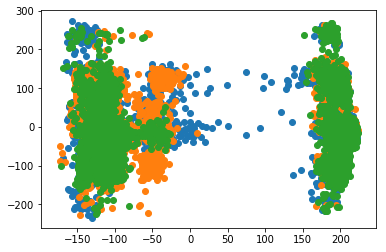

In [21]:
plt.scatter(scores[:5000,0], scores[:5000,1])
plt.scatter(scores[5000:10000,0], scores[5000:10000,1])
plt.scatter(scores[10000:,0], scores[10000:,1])